In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

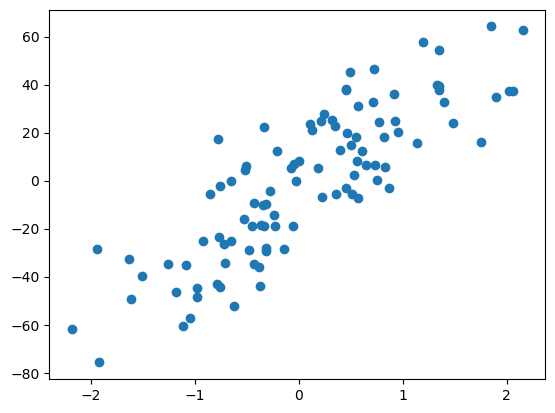

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [8]:
from sklearn.linear_model import Ridge

In [9]:
rr = Ridge(alpha=10)

In [10]:
rr.fit(X,y)

Ridge(alpha=10)

In [11]:
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523574


In [12]:
rr = Ridge(alpha=100)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[12.93442104]
-1.4248441496033313


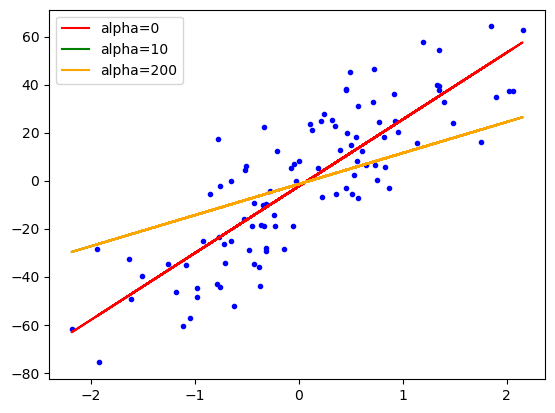

In [13]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr.predict(X),color='orange',label='alpha=200')
plt.legend()

In [14]:
class customRidge:
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m=None
        self.b=None
        self.prediction=None
    
    def fit(self,X_train,y_train):
        num=0
        den=0
        for i in range(X_train.shape[0]):
            num=num+(y_train[i]-y_train.mean())*(X_train[i]-X_train.mean())
            den=den+(X_train[i]-X_train.mean())**2
        self.m=num/(den+self.alpha)
        self.b=self.m*X_train.mean()-y_train.mean()
        print(self.m)
        print(self.b)
        return self.m,self.b
    
    def predict(self, X_test):
        if self.m is not None and self.b is not None:
            self.prediction = self.m * X_test + self.b
            return self.prediction
        else:
            raise ValueError("Model has not been fitted. Please call fit() before making predictions.")


In [15]:
reg=customRidge(alpha=100)


In [16]:
reg.fit(X,y)

[12.93442104]
[1.42484415]


(array([12.93442104]), array([1.42484415]))

In [17]:
# reg.predict(y)
y.shape[0]

100

In [18]:
X.shape[0]
reg.predict(y)

array([-4.42482942e+02, -1.20433048e+02, -2.45469813e+02,  2.65768351e+02,
        3.60432193e+02, -3.61819909e+01, -1.82228191e+02,  7.12740666e+01,
       -3.40385731e+02, -4.50074239e+02,  4.84347030e+02,  1.67674600e+02,
        3.25160323e+02, -2.43823078e+02, -3.02088914e+02,  4.90138135e+02,
        8.80428839e+01, -7.06459247e+01, -6.35154041e+02,  2.07695746e+02,
       -5.54324963e+02,  8.01974687e+01, -3.26067931e+02,  8.13986782e+02,
        1.62937476e+02, -4.21707317e+02, -2.42072715e+02, -3.78734510e+02,
       -3.69646532e+02,  5.81971312e+01,  6.00990096e+02,  3.16920620e+02,
        4.92736909e+02, -4.45805680e+02, -7.98874733e+02, -5.99277603e+02,
       -8.76685366e+01,  5.14905946e+02, -4.54349616e+02,  1.09666661e+02,
       -5.11831624e+02,  1.08433677e+02, -5.55800157e+01, -3.75531121e+01,
        7.49310696e+02,  3.20291438e+02,  2.35708220e+02, -6.74850112e+02,
        4.66012668e+02,  2.06321321e+02,  3.11955130e+02, -3.23547303e+02,
       -5.66763982e+02,  

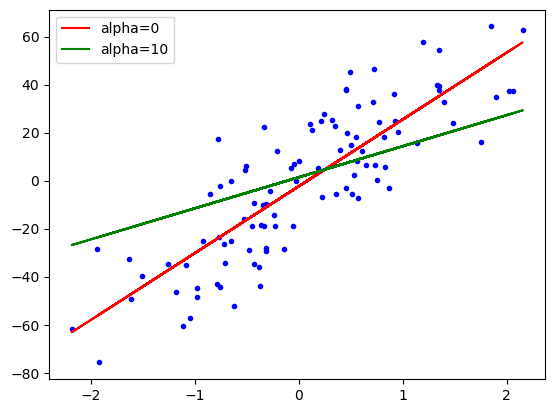

In [19]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,reg.predict(X),color='green',label='alpha=10')
plt.legend()